# Regresión lineal múltiple


## Objetivos

Después de completar este laboratorio, podrá:

* Use scikit-learn para implementar la regresión lineal múltiple
* Cree un modelo, entrénelo, pruébelo y use el modelo


<h1>Índice</h1>

<div class="alerta alerta-bloque alerta-info" style="margin-top: 20px">
     <ol>
         <li><a href="https://#understanding-data">Comprensión de los datos</a></li>
         <li><a href="https://#reading_data">Leyendo los datos en</a></li>
         <li><a href="https://#multiple_regression_model">Modelo de regresión múltiple</a></li>
         <li><a href="https://#prediction">Predicción</a></li>
         <li><a href="https://#practice">Practica</a></li>
     </ol>
</div>
<br>
<hr>


### Importación de paquetes necesarios

In [13]:
# ESCRIBE TU CODIGO AQUI
import pandas as pd
import statsmodels.api as sm
import sklearn as skl


<h2 id="understanding_data">Comprender los datos</h2>

### `FuelConsumption.csv`:

El conjunto de datos de consumo de combustible, **`FuelConsumption.csv`**, contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos livianos nuevos para la venta minorista en Canadá.

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Leyendo los datos en</h2>


In [14]:
# ESCRIBE EL CODIGO AQUI

# Lee los datos a la variable df
df = pd.read_csv('FuelConsumption.csv')

# echa un vistazo al conjunto de datos
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
X = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
y = df["CO2EMISSIONS"]

# Agrega una constante para el término de intersección
X = sm.add_constant(X)

# Crea el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprime un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2251.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:00:06   Log-Likelihood:                -4876.1
No. Observations:                1067   AIC:                             9760.
Df Residuals:                    1063   BIC:                             9780.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   65.2233 

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajustar el modelo de regresión lineal
model = ols("CO2EMISSIONS ~ ENGINESIZE + CYLINDERS + FUELCONSUMPTION_COMB", data=df).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Imprimir el resumen del ANOVA
print(anova_table)


                             sum_sq      df           F         PR(>F)
ENGINESIZE             26533.938457     1.0   48.442844   5.940039e-12
CYLINDERS              24754.721143     1.0   45.194538   2.905673e-11
FUELCONSUMPTION_COMB  390464.567493     1.0  712.868696  1.338839e-120
Residual              582244.440514  1063.0         NaN            NaN


In [17]:
# Recorrer los coeficientes del modelo y seleccionar variables con valor p < 0.05
variables_significativas = [variable for variable, p_valor in zip(X.columns, model.pvalues) if p_valor < 0.05]
# Crear un nuevo conjunto de datos con variables significativas
X_seleccionado = X[variables_significativas]
# Ajustar un nuevo modelo de regresión lineal con las variables seleccionadas
modelo_regresion_significativo = sm.OLS(y, X_seleccionado).fit()
# Imprimir el resumen del nuevo modelo
print(modelo_regresion_significativo.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2251.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:00:06   Log-Likelihood:                -4876.1
No. Observations:                1067   AIC:                             9760.
Df Residuals:                    1063   BIC:                             9780.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   65.2233 

In [20]:
# Calcular la suma de los residuos
suma_residuos = sum(modelo_regresion_significativo.resid)

# Verificar que la suma de los residuos sea cercana a cero
print("Suma de residuos:", suma_residuos)

Suma de residuos: -2.3106849766918458e-11


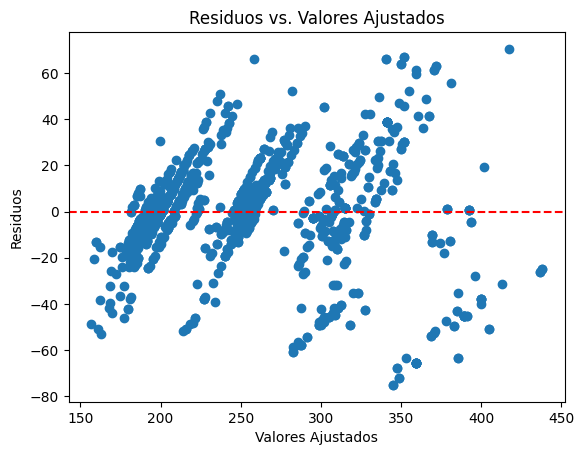

In [21]:
# Graficar los residuos
plt.scatter(modelo_regresion_significativo.fittedvalues, modelo_regresion_significativo.resid)
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Ajustados')
plt.show()

In [18]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de regresión lineal con gradiente descendente
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula R2 y MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.4f}")

Coeficientes: [29.69835707  8.35310755 10.1482463  10.65769455]
Intercepto: [29.75274336]
R2: 0.8239
MSE: 728.3392


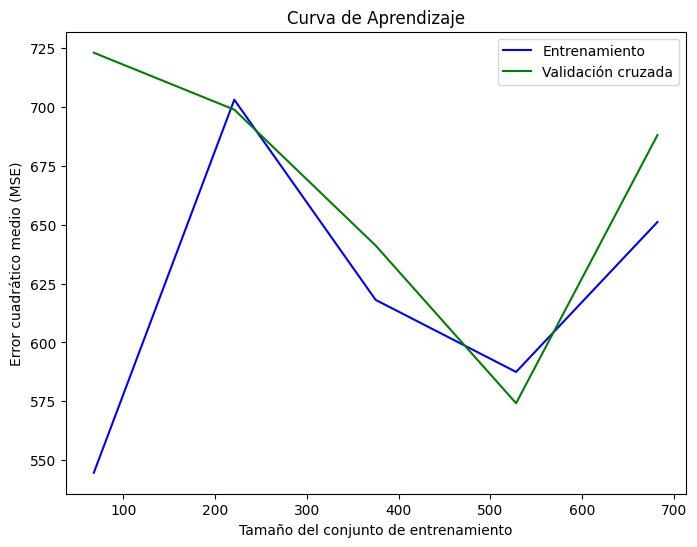

In [19]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor

# Crea el modelo de regresión lineal con gradiente descendente
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Calcula la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)

# Calcula el promedio y la desviación estándar de los puntajes
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento", color="b")
plt.plot(train_sizes, test_scores_mean, label="Validación cruzada", color="g")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Curva de Aprendizaje")
plt.legend()
plt.show()